In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import warnings
warnings.filterwarnings(action='ignore') 

In [2]:

dir = os.getcwd()

print(dir)


/Users/ichang-ug/Documents/GitHub/bitamin_ChurnProject/changwook


데이터 불러오기

In [3]:
# x_train = pd.read_csv(dir + '/data/preprocessed/X_train.csv')

aum_m7 = pd.read_csv(dir + '/data/rawdata/aum_train/aum_m7.csv')
aum_m8 = pd.read_csv(dir + '/data/rawdata/aum_train/aum_m8.csv')
aum_m9 = pd.read_csv(dir + '/data/rawdata/aum_train/aum_m9.csv')
aum_m10 = pd.read_csv(dir + '/data/rawdata/aum_train/aum_m10.csv')
aum_m11 = pd.read_csv(dir + '/data/rawdata/aum_train/aum_m11.csv')
aum_m12 = pd.read_csv(dir + '/data/rawdata/aum_train/aum_m12.csv')

behavior_m7 = pd.read_csv(dir + "/data/rawdata/behavior_train/behavior_m7.csv")
behavior_m8 = pd.read_csv(dir + "/data/rawdata/behavior_train/behavior_m8.csv")
behavior_m9 = pd.read_csv(dir + "/data/rawdata/behavior_train/behavior_m9.csv")
behavior_m10 = pd.read_csv(dir + "/data/rawdata/behavior_train/behavior_m10.csv")
behavior_m11 = pd.read_csv(dir + "/data/rawdata/behavior_train/behavior_m11.csv")
behavior_m12 = pd.read_csv(dir + "/data/rawdata/behavior_train/behavior_m12.csv")

big_event_Q3 = pd.read_csv(dir + "/data/rawdata/big_event_train/big_event_Q3.csv")
big_event_Q4 = pd.read_csv(dir + "/data/rawdata/big_event_train/big_event_Q4.csv")

cunkuan_m7 = pd.read_csv(dir + "/data/rawdata/cunkuan_train/cunkuan_m7.csv")
cunkuan_m8 = pd.read_csv(dir + "/data/rawdata/cunkuan_train/cunkuan_m8.csv")
cunkuan_m9 = pd.read_csv(dir + "/data/rawdata/cunkuan_train/cunkuan_m9.csv")
cunkuan_m10 = pd.read_csv(dir + "/data/rawdata/cunkuan_train/cunkuan_m10.csv")
cunkuan_m11 = pd.read_csv(dir + "/data/rawdata/cunkuan_train/cunkuan_m11.csv")
cunkuan_m12 = pd.read_csv(dir + "/data/rawdata/cunkuan_train/cunkuan_m12.csv")

cust_avli_Q3 = pd.read_csv(dir +"/data/rawdata/cust_avli_train/cust_avli_Q3.csv")
cust_avli_Q4 = pd.read_csv(dir +"/data/rawdata/cust_avli_train/cust_avli_Q4.csv")

cust_info_q3 = pd.read_csv(dir + "/data/rawdata/cust_info_train/cust_info_q3.csv")
cust_info_q4 = pd.read_csv(dir + "/data/rawdata/cust_info_train/cust_info_q4.csv")

y_Q3_3 = pd.read_csv(dir + "/data/rawdata/train_label/y_Q3_3.csv")
y_Q4_3 = pd.read_csv(dir + "/data/rawdata/train_label/y_Q4_3.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/ichang-ug/Documents/GitHub/bitamin_ChurnProject/changwook/data/rawdata/cust_avli_train/cust_avli_Q3.csv'

In [15]:
# 겹치는 고객 확인.
q3_cust = y_Q3_3['cust_no']
q4_cust = y_Q4_3['cust_no']

print(len(q3_cust))
print(q3_cust.isin(q4_cust).sum())
print(len(q4_cust))

69126
62397
76170


q3 고객 중 q4까지 남아있었던 고객은 62397명

다음에는 label 데이터에 존재하는 고객만 x 데이터에서 남기도록 하자.

In [16]:
aum_m7 = aum_m7[aum_m7['cust_no'].isin(q3_cust)]
aum_m8 = aum_m8[aum_m8['cust_no'].isin(q3_cust)]
aum_m9 = aum_m9[aum_m9['cust_no'].isin(q3_cust)]
aum_m10 = aum_m10[aum_m10['cust_no'].isin(q4_cust)]
aum_m11 = aum_m11[aum_m11['cust_no'].isin(q4_cust)]
aum_m12 = aum_m12[aum_m12['cust_no'].isin(q4_cust)]

behavior_m7 = behavior_m7[behavior_m7['cust_no'].isin(q3_cust)]
behavior_m8 = behavior_m8[behavior_m8['cust_no'].isin(q3_cust)]
behavior_m9 = behavior_m9[behavior_m9['cust_no'].isin(q3_cust)]
behavior_m10 = behavior_m10[behavior_m10['cust_no'].isin(q4_cust)]
behavior_m11 = behavior_m11[behavior_m11['cust_no'].isin(q4_cust)]
behavior_m12 = behavior_m12[behavior_m12['cust_no'].isin(q4_cust)]

cunkuan_m7 = cunkuan_m7[cunkuan_m7['cust_no'].isin(q3_cust)]
cunkuan_m8 = cunkuan_m8[cunkuan_m8['cust_no'].isin(q3_cust)]
cunkuan_m9 = cunkuan_m9[cunkuan_m9['cust_no'].isin(q3_cust)]
cunkuan_m10 = cunkuan_m10[cunkuan_m10['cust_no'].isin(q4_cust)]
cunkuan_m11 = cunkuan_m11[cunkuan_m11['cust_no'].isin(q4_cust)]
cunkuan_m12 = cunkuan_m12[cunkuan_m12['cust_no'].isin(q4_cust)]

In [17]:
big_event_Q3 = big_event_Q3[big_event_Q3['cust_no'].isin(q3_cust)]
big_event_Q4 = big_event_Q4[big_event_Q4['cust_no'].isin(q4_cust)]

cust_info_q3 = cust_info_q3[cust_info_q3['cust_no'].isin(q3_cust)]
cust_info_q4 = cust_info_q4[cust_info_q4['cust_no'].isin(q4_cust)]

## 월별 데이터

월별 데이터 크기를 살펴보면

In [18]:
print("aum")
print("m7",len(aum_m7))
print("m8",len(aum_m8))
print("m9",len(aum_m9))
print("m10",len(aum_m10))
print("m11",len(aum_m11))
print("m12",len(aum_m12))

print()
print("behavior")
print("m7",len(behavior_m7))
print("m8",len(behavior_m8))
print("m9",len(behavior_m9))
print("m10",len(behavior_m10))
print("m11",len(behavior_m11))
print("m12",len(behavior_m12))

print()
print("cunkuan")
print("m7",len(cunkuan_m7))
print("m8",len(cunkuan_m8))
print("m9",len(cunkuan_m9))
print("m10",len(cunkuan_m10))
print("m11",len(cunkuan_m11))
print("m12",len(cunkuan_m12))

aum
m7 65135
m8 67276
m9 69126
m10 71496
m11 73931
m12 76170

behavior
m7 65135
m8 67276
m9 69126
m10 71496
m11 73931
m12 76170

cunkuan
m7 64173
m8 66711
m9 69122
m10 70364
m11 73345
m12 76167


분기별 데이터 크기는

In [19]:
print("big_event_")
print("Q3",len(big_event_Q3))
print("Q4",len(big_event_Q4))

print()
print("cust_avli")
print("Q3",len(cust_avli_Q3))
print("Q4",len(cust_avli_Q4))

print()
print("cust_info")
print("Q3",len(cust_info_q3))
print("Q4",len(cust_info_q3))


big_event_
Q3 69126
Q4 76170

cust_avli
Q3 69126
Q4 76170

cust_info
Q3 69126
Q4 69126


In [20]:
print(cust_avli_Q3.isin(q3_cust).sum())
print(cust_avli_Q4.isin(q4_cust).sum())

cust_no    69126
dtype: int64
cust_no    76170
dtype: int64


중간의 cust_avli는 lable 데이터와 동일하므로 이후로 고려하지 않는다.
항목별 크기는 들쑥날쑥함


결측치도 확인해보자

In [22]:
print("Customer Assets(aum)")
print("aum_m7:", aum_m7.isnull().sum().sum())
print("aum_m8:", aum_m8.isnull().sum().sum())
print("aum_m9:", aum_m9.isnull().sum().sum())
print("aum_m10:", aum_m10.isnull().sum().sum())
print("aum_m11:", aum_m11.isnull().sum().sum())
print("aum_m12:", aum_m12.isnull().sum().sum())

print("Customer behavioravior(behavioravior)")
print("behavior_m7:",behavior_m7.isnull().sum().sum())
print("behavior_m8:",behavior_m8.isnull().sum().sum())
print("behavior_m9:",behavior_m9.isnull().sum().sum())
print("behavior_m10:",behavior_m10.isnull().sum().sum())
print("behavior_m11:",behavior_m11.isnull().sum().sum())
print("behavior_m12:",behavior_m12.isnull().sum().sum())

print("Customer Deposits(cunkuan)")
print("cunkuan_m7:", cunkuan_m7.isnull().sum().sum())
print("cunkuan_m8:", cunkuan_m7.isnull().sum().sum())
print("cunkuan_m9:", cunkuan_m7.isnull().sum().sum())
print("cunkuan_m10:", cunkuan_m7.isnull().sum().sum())
print("cunkuan_m11:", cunkuan_m7.isnull().sum().sum())
print("cunkuan_m12:", cunkuan_m7.isnull().sum().sum())


Customer Assets(aum)
aum_m7: 0
aum_m8: 0
aum_m9: 0
aum_m10: 0
aum_m11: 0
aum_m12: 0
Customer behavioravior(behavioravior)
behavior_m7: 0
behavior_m8: 0
behavior_m9: 4947
behavior_m10: 0
behavior_m11: 0
behavior_m12: 3931
Customer Deposits(cunkuan)
cunkuan_m7: 0
cunkuan_m8: 0
cunkuan_m9: 0
cunkuan_m10: 0
cunkuan_m11: 0
cunkuan_m12: 0


Customer behavior의 9월 12월 데이터만 결측치가 있다.

In [28]:
print("behavior_m9:\n",behavior_m9.isnull().sum())
print("behavior_m12:\n", behavior_m12.isnull().sum())

behavior_m9:
 cust_no       0
B1            0
B2            0
B3            0
B4            0
B5            0
B6         4947
B7            0
dtype: int64
behavior_m12:
 cust_no       0
B1            0
B2            0
B3            0
B4            0
B5            0
B6         3931
B7            0
dtype: int64


B6 column에서만 결측치가 존재

In [29]:
null_behaviorM9 = behavior_m9[behavior_m9["B6"].isnull()]['cust_no']
null_behaviorM12 = behavior_m12[behavior_m12["B6"].isnull()]['cust_no']

num = len(null_behaviorM9[null_behaviorM9.isin(null_behaviorM12)])

print(num/4947 *100)
print(num/3931*100)

79.36122902769355
99.87280590180616


9월과 12월의 B6열의 결측데이터의 cust_no은 평균 89.5% 일치한다.

In [30]:
print(len(null_behaviorM9)/len(behavior_m9)*100)
print(len(null_behaviorM12)/len(behavior_m12)*100)

7.156496831872233
5.160824471576736


두 칼럼의 결측율은 5~7 퍼센트로 매우 낮음. 결측 행만 제거해도 될듯


## 분기별 데이터

In [31]:
print("Important Customer Behavior(bigEvent)")
print("big_event_Q3:", big_event_Q3.isnull().sum().sum())
print("big_event_Q4:", big_event_Q4.isnull().sum().sum())

print()
print("Customer Trivias(cust_info)")
print("cust_info_q3:", cust_info_q3.isnull().sum().sum())
print("cust_info_q4:", cust_info_q4.isnull().sum().sum())


Important Customer Behavior(bigEvent)
big_event_Q3: 566912
big_event_Q4: 623613

Customer Trivias(cust_info)
cust_info_q3: 267696
cust_info_q4: 290513


앞선 월별 데이터와는 달리 결측치가 매우 많고, 크게 나온다. 더 자세히 살펴보자

In [32]:
def check_null(df):
    ''' Print percentage of missing values in each columns
    @Param df df: input data frame
    '''
    missing_val = df.isnull().sum()
    for index in missing_val.index:
        if missing_val[index] > 0:
            print('{} has {} missing values. ({:.4%})'.format(index, missing_val[index], missing_val[index]/len(df)))


결측률 큰 데이터 drop

In [33]:
bE_Q3_drop = big_event_Q3.drop(['E4','E7', 'E8', 'E9', 'E11', 'E12', 'E13','E14','E16','E18'], axis=1)
bE_Q4_drop = big_event_Q4.drop(['E4','E7', 'E8', 'E9', 'E11', 'E12', 'E13', 'E14','E16','E18'], axis=1)
ci_Q3_drop = cust_info_q3.drop(['I9', 'I10', 'I13', 'I14'], axis=1)
ci_Q4_drop = cust_info_q4.drop(['I9', 'I10', 'I13', 'I14'], axis=1)

In [34]:
check_null(bE_Q3_drop)
check_null(bE_Q4_drop)
check_null(ci_Q3_drop)
check_null(ci_Q4_drop)

E2 has 3217 missing values. (4.6538%)
E3 has 3217 missing values. (4.6538%)
E5 has 26403 missing values. (38.1955%)
E6 has 3770 missing values. (5.4538%)
E10 has 361 missing values. (0.5222%)
E2 has 3153 missing values. (4.1394%)
E3 has 3153 missing values. (4.1394%)
E5 has 28726 missing values. (37.7130%)
E6 has 3768 missing values. (4.9468%)
E10 has 455 missing values. (0.5973%)
I1 has 32 missing values. (0.0463%)
I5 has 6925 missing values. (10.0179%)
I1 has 32 missing values. (0.0420%)
I5 has 4679 missing values. (6.1428%)


필요없는 column drop

In [35]:
ci_Q3_drop.drop(['I8', 'I12', 'I15'],axis=1, inplace = True)
ci_Q4_drop.drop(['I8', 'I12', 'I15'],axis=1, inplace = True)

결측치 채우기

In [36]:
# datetime 결측치
fmt = '%Y-%m-%d'
col_names = ['E1', 'E2', 'E3', 'E5', 'E6', 'E10']
for X in [bE_Q3_drop, bE_Q4_drop]:
    for col_name in col_names:
        X[col_name] = pd.to_datetime(X[col_name], format=fmt, errors='ignore')

남아있는 데이터들의 분포를 살펴보자

In [37]:
def zscore(data): # z-score 함수 생성
    mean = np.mean(data) #평균
    std = np.std(data)   #표준편차
    z_scores = [(y-mean)/std for y in data] #z-score
    return z_scores

In [38]:
zlist = []
for data in [bE_Q3_drop, bE_Q4_drop]:
    for col in col_names:
        zlist.append(zscore(data[col]))

zlist_Q3 = zlist[:6]
zlist_Q4 = zlist[6:]

zlist_Q3 = np.array(zlist_Q3)
zlist_Q3 = zlist_Q3.T
zlist_Q4 = np.array(zlist_Q4)
zlist_Q4 = zlist_Q4.T

bEzlist_Q3 = pd.DataFrame(zlist_Q3, columns=col_names)
bEzlist_Q4 = pd.DataFrame(zlist_Q4, columns=col_names)


array([[<AxesSubplot: title={'center': 'E1'}>,
        <AxesSubplot: title={'center': 'E2'}>],
       [<AxesSubplot: title={'center': 'E3'}>,
        <AxesSubplot: title={'center': 'E5'}>],
       [<AxesSubplot: title={'center': 'E6'}>,
        <AxesSubplot: title={'center': 'E10'}>]], dtype=object)

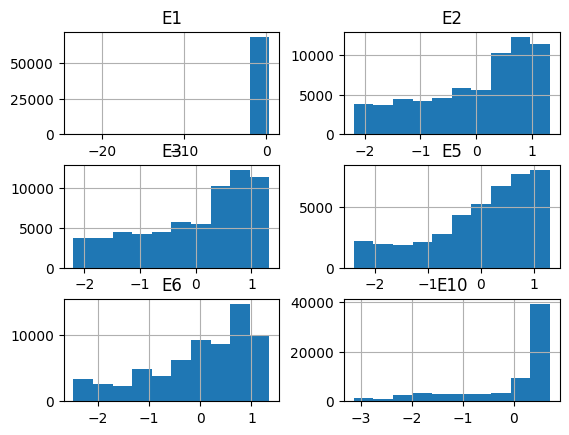

In [39]:
bEzlist_Q3.hist()

array([[<AxesSubplot: title={'center': 'E1'}>,
        <AxesSubplot: title={'center': 'E2'}>],
       [<AxesSubplot: title={'center': 'E3'}>,
        <AxesSubplot: title={'center': 'E5'}>],
       [<AxesSubplot: title={'center': 'E6'}>,
        <AxesSubplot: title={'center': 'E10'}>]], dtype=object)

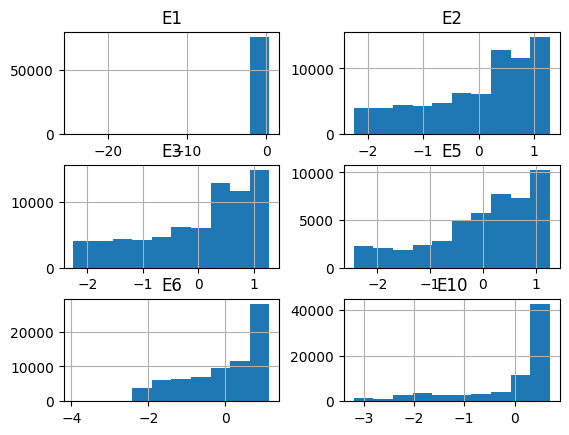

In [40]:
bEzlist_Q4.hist()

In [41]:
for X in [bE_Q3_drop, bE_Q4_drop]:    
    X['E2'] = X['E2'].replace(np.NaN, X['E2'].max())
    X['E3'] = X['E3'].replace(np.NaN, X['E3'].max())
    X['E5'] = X['E5'].replace(np.NaN, X['E5'].max())
    X['E6'] = X['E6'].replace(np.NaN, X['E6'].max())
    X['E10'] = X['E10'].replace(np.NaN, X['E10'].max())

In [42]:
for X in [ci_Q3_drop, ci_Q4_drop]:
    X['I1'] = X['I1'].replace(np.NaN, 'unknown')
    X['I5'] = X['I5'].replace(np.NaN, 'unknown')

## 데이터 merge

In [43]:
aum_m78 = pd.merge(aum_m7, aum_m8, left_on='cust_no', right_on='cust_no', how = 'inner' )
aum_q3 = pd.merge(aum_m78, aum_m9, on='cust_no', how="inner")
aum_m1011 = pd.merge(aum_m10, aum_m11, left_on='cust_no', right_on='cust_no', how = 'inner' )
aum_q4 = pd.merge(aum_m1011, aum_m12, on='cust_no', how="inner")


behavior_m78 = pd.merge(behavior_m7, behavior_m8, left_on='cust_no', right_on='cust_no', how = 'inner' )
behavior_q3 = pd.merge(behavior_m78, behavior_m9, on='cust_no', how="inner")
behavior_m1011 = pd.merge(behavior_m10, behavior_m11, left_on='cust_no', right_on='cust_no', how = 'inner' )
behavior_q4 = pd.merge(behavior_m1011, behavior_m12, on='cust_no', how="inner")


cunkuan_m78 = pd.merge(cunkuan_m7, cunkuan_m8, left_on='cust_no', right_on='cust_no', how = 'inner' )
cunkuan_q3 = pd.merge(cunkuan_m78, cunkuan_m9, on='cust_no', how="inner")
cunkuan_m1011 = pd.merge(cunkuan_m10, cunkuan_m11, left_on='cust_no', right_on='cust_no', how = 'inner' )
cunkuan_q4 = pd.merge(cunkuan_m1011, cunkuan_m12, on='cust_no', how="inner")

In [44]:
X_train_Q3 = pd.merge(y_Q3_3["cust_no"], aum_q3, on="cust_no", how = "inner")
X_train_Q3 = pd.merge(X_train_Q3, behavior_q3, on = "cust_no", how="inner")
X_train_Q3 = pd.merge(X_train_Q3, cunkuan_q3, on="cust_no", how = "inner")
X_train_Q3 = pd.merge(X_train_Q3, bE_Q3_drop, on="cust_no", how = "inner")
X_train_Q3 = pd.merge(X_train_Q3, ci_Q3_drop, on="cust_no", how = "inner")

X_train_Q4 = pd.merge(y_Q4_3["cust_no"], aum_q4, on="cust_no", how = "inner")
X_train_Q4 = pd.merge(X_train_Q4, behavior_q4, on = "cust_no", how="inner")
X_train_Q4 = pd.merge(X_train_Q4, cunkuan_q4, on="cust_no", how = "inner")
X_train_Q4 = pd.merge(X_train_Q4, bE_Q4_drop, on="cust_no", how = "inner")
X_train_Q4 = pd.merge(X_train_Q4, ci_Q4_drop, on="cust_no", how = "inner")

In [46]:
check_null(X_train_Q3)

B6 has 4943 missing values. (7.7026%)


In [127]:
check_null(X_train_Q4)

B6 has 3928 missing values. (5.5824%)


### Categorical data identify

In [69]:
cat_Q3 = X_train_Q3.select_dtypes(include=['object', 'datetime'])
cat_Q4 = X_train_Q4.select_dtypes(include=['object','datetime'])

In [70]:
cat_Q3.head()

,cust_no,B6,E1,E2,E3,E5,E6,E10,I3,I5
0,0xb2d640a6,2019-09-12 04:09:00,2019-01-11,2019-01-11,2019-01-11,2019-08-08,2019-06-14,2019-06-13,黄金,不便分类的其他从业人员
1,0xb2d4dd44,2019-07-23 11:34:00,2018-06-20,2018-06-20,2018-06-20,2018-07-18,2018-08-01,2019-09-27,普通客户,办事人员和有关人员
2,0xb2d69fef,2019-08-18 23:54:00,2019-03-18,2019-03-18,2019-03-18,2019-09-30,2019-03-19,2019-09-29,黄金,不便分类的其他从业人员
3,0xb2d42c89,2019-09-26 18:24:00,2018-03-28,2018-03-28,2018-03-28,2018-03-28,2019-07-23,2018-05-14,普通客户,不便分类的其他从业人员
4,0xb2d6b622,2019-09-29 10:49:00,2019-04-02,2019-04-02,2019-04-02,2019-04-02,2019-05-21,2019-07-08,黄金,办事人员和有关人员


In [68]:
X_train_Q3['I1'].replace(['男性','女性','unknown'],[0,1,0.5], inplace=True)
X_train_Q4['I1'].replace(['男性','女性','unknown'],[0,1,0.5], inplace =True)

In [71]:
cat_Q3['I3'].unique()

array(['黄金', '普通客户', '白金', '钻石'], dtype=object)

In [47]:
X_train_Q3.to_csv(dir + "/data/X_train_Q3.csv")
X_train_Q4.to_csv(dir + "/data/X_train_Q4.csv")